
<a href="https://colab.research.google.com/github.com/hardayal/EVA/blob/master/Session_5/EVA_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

### Importing Keras library 

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Importing other required library

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Load pre-shuffled MNIST data into train and test sets and apply image normalization

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
Batches train=938, test=157
Batch shape=(64, 28, 28, 1), min=-0.424, max=2.822


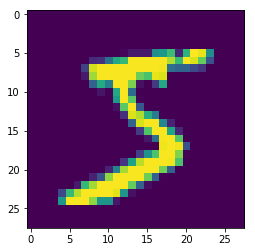

In [3]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

# load dataset
(trainXX, trainY), (testXX, testY) = mnist.load_data()

# print first image
print (trainXX.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(trainXX[0])

# reshape dataset to have a single channel
width, height, channels = trainXX.shape[1], trainXX.shape[2], 1
trainX = trainXX.reshape((trainXX.shape[0], width, height, channels))
testX = testXX.reshape((testXX.shape[0], width, height, channels))


trainy = to_categorical(trainY)
testy = to_categorical(testY)

# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# Train iterator
train_iterator = datagen.flow(trainX, trainy, batch_size=64)

# Test iterator
test_iterator = datagen.flow(testX, testy, batch_size=64)

print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [4]:
print(trainX.shape)
print(testX.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Less than 15k paramter and target validation accuracy >= 99.3%

### 1. Image normalization
### 2. L2 regularization 

In [0]:
# import regularizer
from keras.regularizers import l2
# instantiate regularizer
reg = l2(0.0001)

In [6]:
from keras.layers import Activation, MaxPooling2D, Dropout, BatchNormalization
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1), kernel_regularizer=reg)) # 26

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=reg)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu', kernel_regularizer=reg)) #24
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=reg)) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=reg)) # 8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=reg)) # 6
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=reg)) # 4
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4, 4)) # 1

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

W0622 17:15:14.194562 140557815310208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
W0622 17:15:14.242024 140557815310208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 17:15:14.248845 140557815310208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        170       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        1456      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


#### Compile the model

In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0622 17:15:24.618591 140557815310208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [8]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpointer = ModelCheckpoint(filepath='EVA_Assignment5_model.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')

history = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator),
                              epochs=40, validation_data=test_iterator,validation_steps=len(test_iterator), callbacks=[checkpointer])

W0622 17:15:31.504178 140557815310208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/40
938/938 [==============================] - 18s 19ms/step - loss: 0.2772 - acc: 0.9157 - val_loss: 0.0794 - val_acc: 0.9785

Epoch 00001: val_acc improved from -inf to 0.97850, saving model to EVA_Assignment5_model.h5
Epoch 2/40
938/938 [==============================] - 13s 14ms/step - loss: 0.0917 - acc: 0.9745 - val_loss: 0.0705 - val_acc: 0.9807

Epoch 00002: val_acc improved from 0.97850 to 0.98070, saving model to EVA_Assignment5_model.h5
Epoch 3/40
938/938 [==============================] - 13s 14ms/step - loss: 0.0743 - acc: 0.9795 - val_loss: 0.0556 - val_acc: 0.9853

Epoch 00003: val_acc improved from 0.98070 to 0.98530, saving model to EVA_Assignment5_model.h5
Epoch 4/40
938/938 [==============================] - 13s 14ms/step - loss: 0.0638 - acc: 0.9836 - val_loss: 0.0490 - val_acc: 0.9874

Epoch 00004: val_acc improved from 0.98530 to 0.98740, saving model to EVA_Assignment5_model.h5
Epoch 5/40
938/938 [==============================] - 13s 13ms/step - loss: 0.0

In [0]:
# Load the weights with the best validation accuracy:
model.load_weights('EVA_Assignment5_model.h5')

#### Validate the model accuracy with test data

In [10]:
# evaluate model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator))
print('Test Accuracy: %.3f' % (acc * 100))

Test Accuracy: 99.370


### Plotting train and test accuracy graph with each epoch

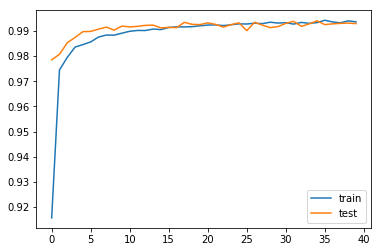

In [11]:
# plot history
from matplotlib import pyplot
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

### Predicting the test data using the model

In [0]:
pred_classes = model.predict_classes(testX)

In [13]:
wrongly_predicted = []
for i,v in enumerate(pred_classes):
  if pred_classes[i] != testY[i]:
    print( str(i) + ' ==> Predicted:' + str(pred_classes[i]) + ' - Actual: ' + str(testY[i]))
    wrongly_predicted.append(i)

8 ==> Predicted:6 - Actual: 5
41 ==> Predicted:9 - Actual: 7
46 ==> Predicted:4 - Actual: 1
79 ==> Predicted:9 - Actual: 7
86 ==> Predicted:9 - Actual: 7
96 ==> Predicted:4 - Actual: 1
110 ==> Predicted:6 - Actual: 8
111 ==> Predicted:2 - Actual: 7
115 ==> Predicted:9 - Actual: 4
121 ==> Predicted:9 - Actual: 4
124 ==> Predicted:4 - Actual: 7
143 ==> Predicted:2 - Actual: 1
167 ==> Predicted:6 - Actual: 5
171 ==> Predicted:9 - Actual: 7
175 ==> Predicted:2 - Actual: 7
180 ==> Predicted:4 - Actual: 1
184 ==> Predicted:3 - Actual: 8
199 ==> Predicted:3 - Actual: 2
209 ==> Predicted:4 - Actual: 9
224 ==> Predicted:2 - Actual: 1
229 ==> Predicted:2 - Actual: 7
234 ==> Predicted:3 - Actual: 7
243 ==> Predicted:2 - Actual: 7
254 ==> Predicted:2 - Actual: 7
255 ==> Predicted:2 - Actual: 7
257 ==> Predicted:6 - Actual: 8
262 ==> Predicted:9 - Actual: 7
263 ==> Predicted:9 - Actual: 7
266 ==> Predicted:6 - Actual: 8
290 ==> Predicted:6 - Actual: 8
300 ==> Predicted:2 - Actual: 4
337 ==> Predict

### Displaying 25 misclassified images

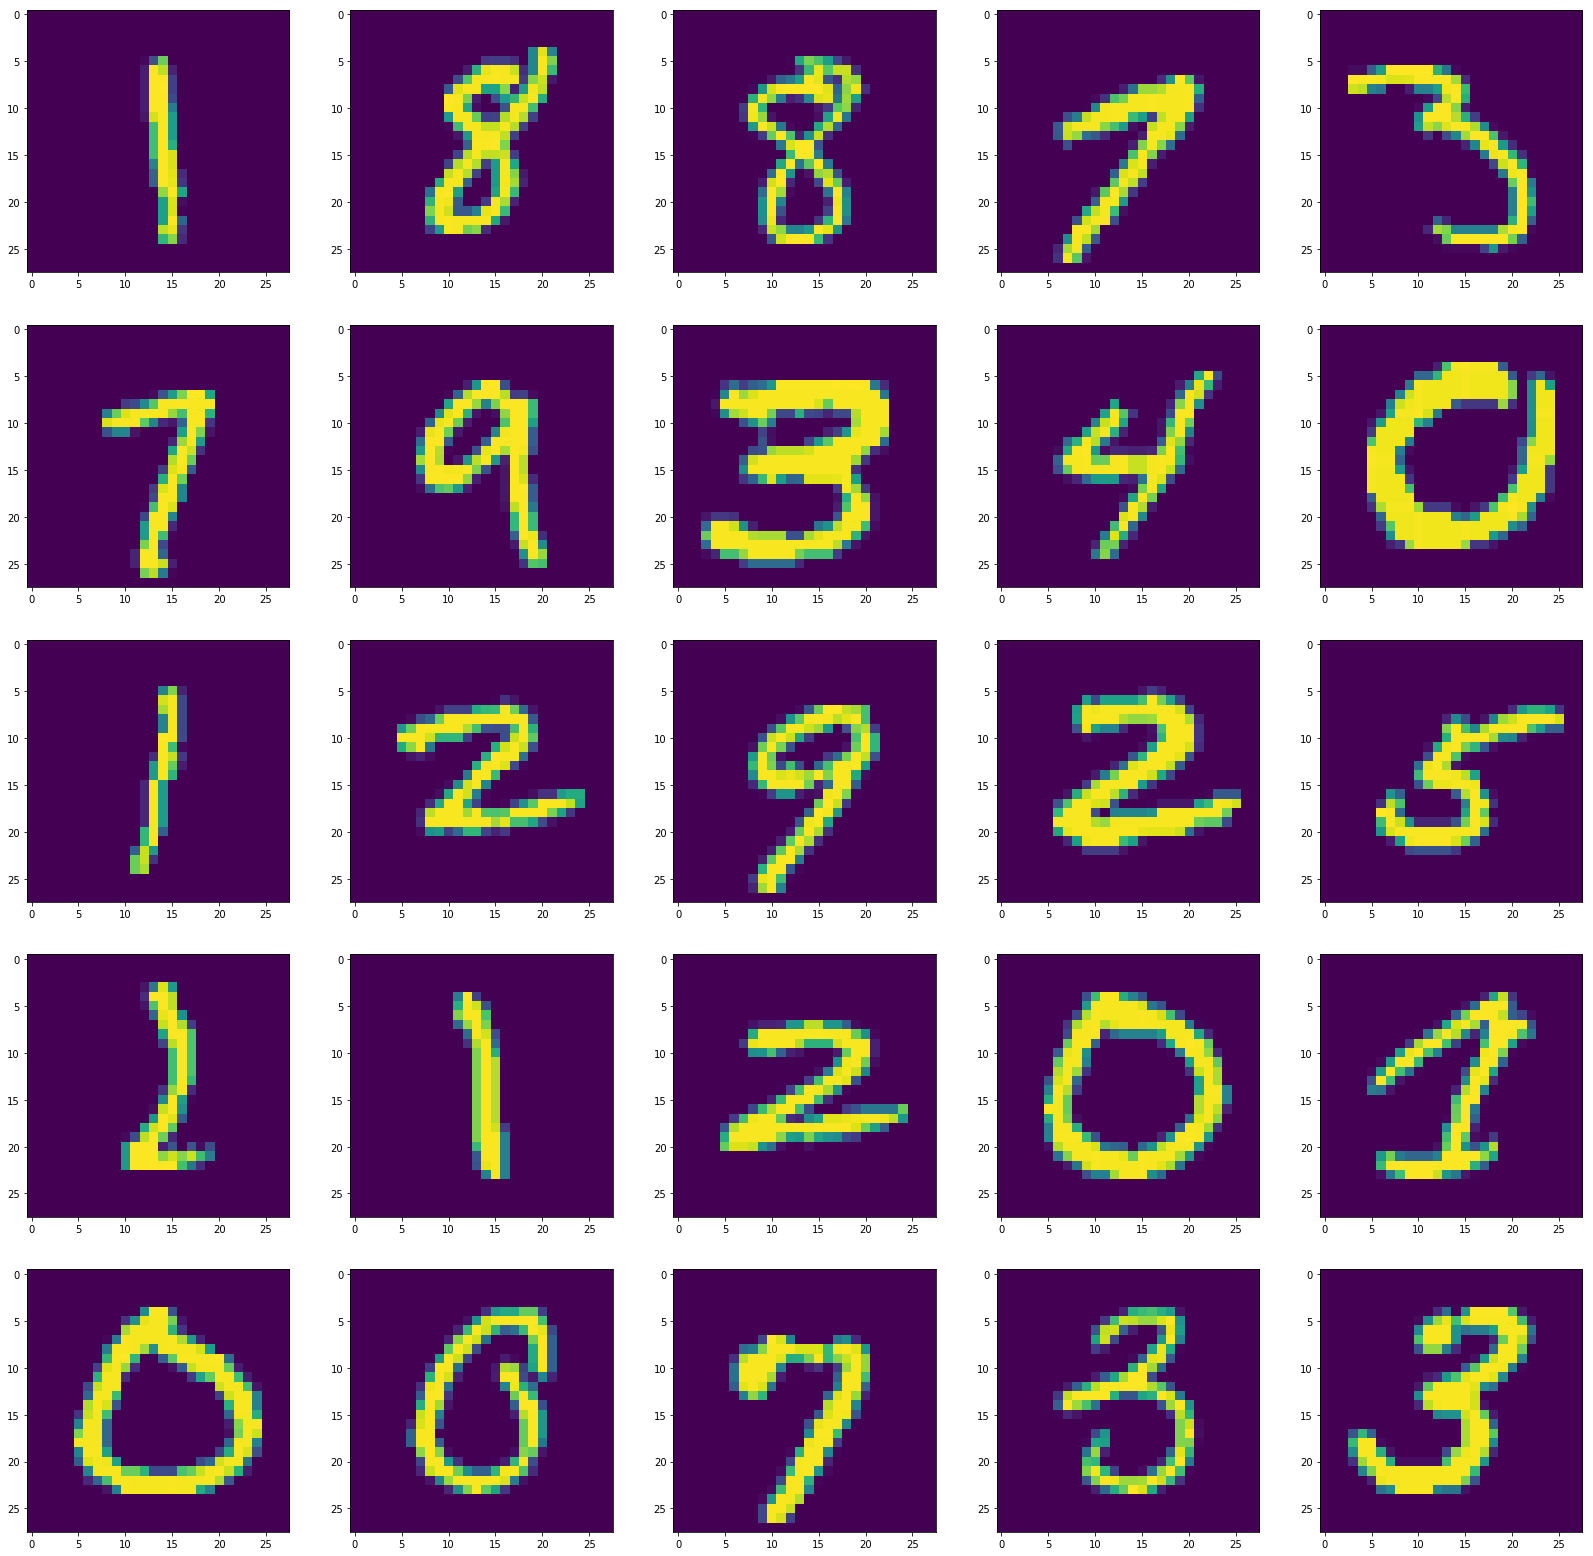

In [14]:
import numpy as np
import matplotlib.pyplot as plt

w=28
h=20
fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = trainXX[wrongly_predicted[i-1]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()